# Week 3 Homework - Jon Workman

In [108]:
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
%matplotlib inline

In [109]:
df = pd.read_csv('seattleWeather_1948-2017.csv').dropna()

## Clean data and add feature

In [110]:
df.RAIN = df.RAIN.astype(int)
df['DATE'] =  pd.to_datetime(df['DATE'], format='%Y-%m-%d')
df['actual'] = df['PRCP']

In [138]:
# Avg precipitation from last 7 days
df['average'] = df['PRCP'].rolling(8).mean().round(1)
df['rain_day'] = df['RAIN'].shift(1)

In [154]:
df['average'] = np.where(df['average'] > 0.1, 1,0)

## Visualisation

In [155]:
df['RAIN'] = df["RAIN"].map(lambda i: 1 if i==True else 0)
df['RAIN'].value_counts()

0    14632
1    10881
Name: RAIN, dtype: int64

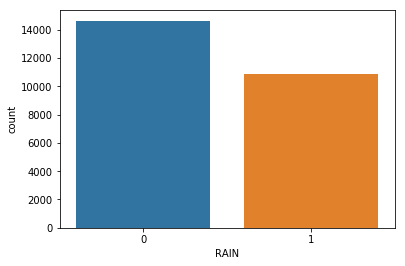

In [156]:
sns.countplot(data=df, x='RAIN')

In [157]:
chance_of_rain = 10900 / (14648 + 10900)
chance_of_rain

0.4266478785032096

In [163]:
df.drop(df.index[0:7], inplace=True)
df.head(10)

,DATE,PRCP,TMAX,TMIN,RAIN,actual,average,rain_day
49,1948-02-19,0.00,45,30,0,0.00,1,1.0
50,1948-02-20,0.74,45,35,1,0.74,1,0.0
51,1948-02-21,0.46,49,37,1,0.46,1,1.0
52,1948-02-22,0.11,47,38,1,0.11,1,1.0
53,1948-02-23,0.00,47,36,0,0.00,1,1.0
54,1948-02-24,0.05,44,36,1,0.05,1,0.0
55,1948-02-25,0.98,47,41,1,0.98,1,1.0
56,1948-02-26,0.09,49,37,1,0.09,1,1.0
57,1948-02-27,0.00,47,35,0,0.00,1,1.0
58,1948-02-28,0.00,50,32,0,0.00,1,0.0


In [144]:
# TASK 2: define Pclass/Parch as the features and Survived as the response
feature_cols = ['rain_day']
X = df[feature_cols]
y = df.average

In [145]:
# TASK 3: split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [146]:
X_train.describe()

,rain_day
count,19145.000000
mean,0.426221
std,0.494540
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [147]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [159]:
coeffs1 = zip(feature_cols, logreg.coef_[0])
list(coeffs1)

[('rain_day', 1.9393584260157979)]

In [160]:
# TASK 5: make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.700094014416


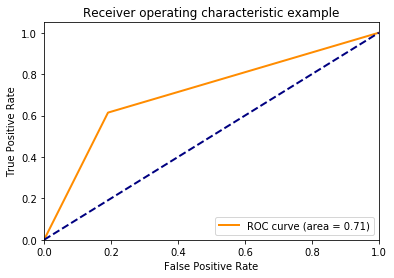

In [162]:
# Generate the ROC curve for our ne model

# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr,tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
